**Extracting data for Stock Market**

In [47]:
!pip install pandas_ta
!pip install yfinance


- y_finance --> yahoo finance packagae created by yahoo to access data from yahoo website.
- pandas_ta -->
technical analysis library for Python that extends the functionality of the popular pandas library. It provides a variety of indicators and tools to help analyze financial time series data, making it easier to perform technical analysis for trading strategies.

In [48]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf
from pandas_datareader import data

**download stock trade data using yfinance**

In [49]:
#daily data valid for indian and american companies
# download stock data
#infosys daily dataframe
df_infy_d = yf.download('INFY.NS',start='2004-01-01',end = '2021-12-28',interval='1d')
df_infy_d.head(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,,
2004-01-01 00:00:00+00:00,59.823547,88.067970,88.356247,87.234375,87.46875,11811200
2004-01-02 00:00:00+00:00,60.146725,88.543747,89.218750,87.750000,88.28125,17143168
2004-01-05 00:00:00+00:00,62.480732,91.979691,92.890625,88.750000,89.84375,24806720
2004-01-06 00:00:00+00:00,60.339905,88.828125,93.906250,88.005470,92.96875,24549504
2004-01-07 00:00:00+00:00,60.426937,88.956253,90.578125,87.394531,89.81250,38803008


In [50]:
help( yf.download)

Help on function download in module yfinance.multi:

download(tickers, start=None, end=None, actions=False, threads=True, ignore_tz=None, group_by='column', auto_adjust=False, back_adjust=False, repair=False, keepna=False, progress=True, period='max', interval='1d', prepost=False, proxy=None, rounding=False, timeout=10, session=None)
    Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime, inclusive.
            Default is 99 years ago
            E.g. for start="2020-01-01", the first data point will be on "2020-01-01"
        end: str
            Downlo

In [51]:
#download Index data
df_nifty_d = yf.download('^NSEI',start='2004-01-01',end = '2021-12-28',interval='1d')
df_nifty_d.head(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2007-09-17 00:00:00+00:00,4494.649902,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18 00:00:00+00:00,4546.200195,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19 00:00:00+00:00,4732.350098,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20 00:00:00+00:00,4747.549805,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21 00:00:00+00:00,4837.549805,4837.549805,4855.700195,4733.700195,4752.950195,0


1. ^ -- whenever we found this symbol then it means this is an index .
2. ^NSEI-- Nifty index
3.
The symbol ^NSEI refers to the Nifty 50 Index, which is a stock market index representing the weighted average of 50 of the largest publicly traded companies on the National Stock Exchange (NSE) of India.

*This is how yfiance differentiate between Script,Stock and Index* <br>
Script: This term is often used interchangeably with "stock" in many markets but can also refer to any tradable security, including stocks, ETFs, or mutual funds. In a broader context, a script could encompass any financial instrument available for trading.

In [52]:
#download Multiple item data
df_all_d = yf.download('INFY.NS ^NSEI',start='2004-01-01',end = '2021-12-28',interval='1d')
df_all_d.tail(5)

[*********************100%***********************]  2 of 2 completed


Price                        Adj Close                      Close  \
Ticker                         INFY.NS         ^NSEI      INFY.NS   
Date                                                                
2021-12-21 00:00:00+00:00  1717.679688  16770.849609  1811.599976   
2021-12-22 00:00:00+00:00  1730.100464  16955.449219  1824.699951   
2021-12-23 00:00:00+00:00  1761.294922  17072.599609  1857.599976   
2021-12-24 00:00:00+00:00  1766.888916  17003.750000  1863.500000   
2021-12-27 00:00:00+00:00  1769.401733  17086.250000  1866.150024   

Price                                           High                \
Ticker                            ^NSEI      INFY.NS         ^NSEI   
Date                                                                 
2021-12-21 00:00:00+00:00  16770.849609  1838.000000  16936.400391   
2021-12-22 00:00:00+00:00  16955.449219  1829.150024  16971.000000   
2021-12-23 00:00:00+00:00  17072.599609  1861.599976  17118.650391   
2021-12-24 00:00:00+00:00  17003.750000  1875.750000  17155.599609   
2021-12-27 00:00:00+00:00  17086.250000  1874.500000  17112.050781   

Price                              Low                       Open  \
Ticker                         INFY.NS         ^NSEI      INFY.NS   
Date                                                                
2021-12-21 00:00:00+00:00  1801.000000  16688.250000  1801.000000   
2021-12-22 00:00:00+00:00  1812.349976  16819.500000  1825.000000   
2021-12-23 00:00:00+00:00  1827.000000  17015.550781  1831.250000   
2021-12-24 00:00:00+00:00  1854.000000  16909.599609  1872.949951   
2021-12-27 00:00:00+00:00  1845.050049  16833.199219  1860.000000   

Price                                     Volume            
Ticker                            ^NSEI  INFY.NS     ^NSEI  
Date                                                        
2021-12-21 00:00:00+00:00  16773.150391  5353584  241000.0  
2021-12-22 00:00:00+00:00  16865.550781  4156428  207900.0  
2021-12-23 00:00:00+00:00  17066.800781  4112933  197000.0  
2021-12-24 00:00:00+00:00  17149.500000  3780347  182600.0  
2021-12-27 00:00:00+00:00  16937.750000  2647733  144800.0

In [53]:
#Infosys weekly data
df_infy_w = yf.download('INFY.NS',start='2021-02-10',end='2022-02-10',interval='1wk')
df_infy_w.head(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,,
2021-02-08 00:00:00+00:00,1217.843872,1309.800049,1323.750000,1283.050049,1295.800049,16422399
2021-02-15 00:00:00+00:00,1200.642700,1291.300049,1328.400024,1275.000000,1320.000000,27662922
2021-02-22 00:00:00+00:00,1165.310425,1253.300049,1308.550049,1244.750000,1295.000000,42442112
2021-03-01 00:00:00+00:00,1224.259277,1316.699951,1363.849976,1259.000000,1263.300049,43802236
2021-03-08 00:00:00+00:00,1278.326660,1374.849976,1391.699951,1317.199951,1324.800049,29025610


In [54]:
#weekly index data
df_infy_w = yf.download('^NSEI',start='2021-02-10',end='2022-02-10',interval='1wk')
df_infy_w.head(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2021-02-08 00:00:00+00:00,15163.299805,15163.299805,15243.500000,14977.200195,15119.049805,1696700
2021-02-15 00:00:00+00:00,14981.750000,14981.750000,15431.750000,14898.200195,15270.299805,3092100
2021-02-22 00:00:00+00:00,14529.150391,14529.150391,15176.500000,14467.750000,14999.049805,3665300
2021-03-01 00:00:00+00:00,14938.099609,14938.099609,15273.150391,14638.549805,14702.500000,2848800
2021-03-08 00:00:00+00:00,15030.950195,15030.950195,15336.299805,14919.900391,15002.450195,1573100


In [55]:
#Hourly Data
#Download Stock Data
df_infy_hr = yf.download("INFY.NS", start="2024-01-05", end="2024-01-09", interval="60m")

#Download Index Data
df_nifty_hr = yf.download("^NSEI", start="2024-01-05", end="2024-01-09", interval="60m")

#Download Multiple Item Data
df_all_hr = yf.download("INFY.NS ^NSEI", start="2024-01-05", end="2024-01-09", interval="60m")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed


In [56]:
df_nifty_hr.head(5)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Datetime,,,,,,
2024-01-05 09:15:00+00:00,21728.949219,21728.949219,21749.199219,21705.750000,21705.750000,0
2024-01-05 10:15:00+00:00,21693.150391,21693.150391,21742.849609,21669.800781,21730.349609,0
2024-01-05 11:15:00+00:00,21690.699219,21690.699219,21699.449219,21666.400391,21692.400391,0
2024-01-05 12:15:00+00:00,21695.849609,21695.849609,21706.300781,21678.250000,21690.650391,0
2024-01-05 13:15:00+00:00,21649.199219,21649.199219,21699.449219,21644.449219,21695.699219,0


Save Data to local drive

In [57]:
from google.colab import files
df_infy_d.to_csv('infy_daily.csv')
files.download('infy_daily.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download Stock fundamental data using Yfinance

In [58]:
infy = yf.Ticker('INFY.NS')
infy

yfinance.Ticker object <INFY.NS>


##### (e.g., 2022-01-19 00:00:00+05:30 4231379968) represent a date and time (in the specified timezone) along with a corresponding number of shares outstanding on that date.
- "shares outstanding" refers to the total number of a company's shares that are currently held by investors.

In [59]:
infy.get_shares_full(start = '2022-01-01',end = None)

,0
2022-01-19 00:00:00+05:30,4231379968
2022-01-20 00:00:00+05:30,4191160064
2022-01-24 00:00:00+05:30,4191160064
2022-01-27 00:00:00+05:30,4191180032
2022-01-28 00:00:00+05:30,4299899904
...,...
2024-10-23 00:00:00+05:30,4141910016
2024-10-23 00:00:00+05:30,4144480000
2024-10-24 00:00:00+05:30,4141910016
2024-10-25 00:00:00+05:30,4164250112


In [60]:
infy.history(start='2020-01-01',end=None,period='1d')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-01 00:00:00+05:30,667.054744,671.592532,664.831218,668.733704,2112415,0.0,0.0
2020-01-02 00:00:00+05:30,670.594223,672.318549,663.333763,666.782471,5658200,0.0,0.0
2020-01-03 00:00:00+05:30,666.056359,678.852895,666.056359,677.037781,7882938,0.0,0.0
2020-01-06 00:00:00+05:30,677.128620,684.116824,668.416090,670.548828,6519403,0.0,0.0
2020-01-07 00:00:00+05:30,669.777392,673.952134,658.069879,660.611084,7899363,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-21 00:00:00+05:30,1891.099976,1898.800049,1838.000000,1852.750000,4654601,0.0,0.0
2024-10-22 00:00:00+05:30,1858.199951,1877.800049,1846.949951,1851.599976,4125240,0.0,0.0
2024-10-23 00:00:00+05:30,1845.250000,1886.000000,1844.000000,1873.400024,4311910,0.0,0.0


In [61]:
infy.get_info()

{'address1': 'Plot No. 44/97 A',
 'address2': '3rd cross Electronic City Hosur Road',
 'city': 'Bengaluru',
 'zip': '560100',
 'country': 'India',
 'phone': '91 80 2852 0261',
 'fax': '91 80 2852 0362',
 'website': 'https://www.infosys.com',
 'industry': 'Information Technology Services',
 'industryKey': 'information-technology-services',
 'industryDisp': 'Information Technology Services',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "Infosys Limited, together with its subsidiaries, provides consulting, technology, outsourcing, and next-generation digital services in North America, Europe, India, and internationally. It provides digital marketing and digital workplace, digital commerce, digital experience and interactions, metaverse, data analytics and AI, applied AI, generative AI, sustainability, blockchain, engineering, Internet of Things, enterprise agile DevOps, application modernization, cloud, digital process automatio

In [62]:
infy.balance_sheet

,2024-03-31,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Treasury Shares Number,10916829.0,12172119.0,13725712.0,15514732.0,NaN
Ordinary Shares Number,4139950635.0,4136387925.0,4193012929.0,4245146114.0,NaN
Share Issued,4150867464.0,4148560044.0,4206738641.0,4260660846.0,NaN
Total Debt,1002000000.0,1010000000.0,722000000.0,728000000.0,NaN
Tangible Book Value,9517000000.0,8077000000.0,8899000000.0,9327000000.0,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,3433000000.0,2359000000.0,3229000000.0,3751000000.0,NaN
Other Short Term Investments,1660000000.0,878000000.0,924000000.0,371000000.0,NaN
Cash And Cash Equivalents,1773000000.0,1481000000.0,2305000000.0,3380000000.0,NaN
Cash Equivalents,0.0,261000000.0,465000000.0,635000000.0,NaN




1. **Treasury Shares Number**: This represents the number of shares the company has repurchased from the market and holds in its treasury. Treasury shares are not included in the calculation of earnings per share (EPS) or dividends.

2. **Ordinary Shares Number**: The total number of ordinary (or common) shares outstanding. These shares represent ownership in the company and may receive dividends.

3. **Shares Issued**: The total number of shares a company has issued, including those held by the public, insiders, and treasury. This can differ from outstanding shares if the company holds treasury stock.

4. **Total Debt**: The company’s total debt obligations, including both short-term and long-term debt. This figure helps assess the company’s leverage and debt management.

5. **Tangible Book Value**: This is the book value of the company after excluding intangible assets, like goodwill or patents. It reflects the tangible assets’ worth if the company were liquidated.

6. **Cash, Cash Equivalents, and Short-Term Investments**: The sum of highly liquid assets that can quickly be converted to cash, providing an overview of the company's available liquid resources.

7. **Other Short-Term Investments**: Investments that are not cash or cash equivalents but can be quickly liquidated, usually within a year, such as marketable securities.

8. **Cash and Cash Equivalents**: Cash on hand plus any short-term investments that can be converted into cash within three months or less. This is a key measure of liquidity.

9. **Cash Equivalents**: Specific assets that are very liquid, like treasury bills or money market funds, and can quickly be converted into cash.

The cash flow statement provides insights into a company's cash inflows and outflows over a period. Here are the most important and frequently used terms (often appearing as rows) in a cash flow statement, categorized by its three sections:

### 1. **Operating Activities**
   - **Net Cash from Operating Activities**: The net cash generated from a company's core business operations. This is a key indicator of operational efficiency and sustainability.
   - **Net Income**: The profit or loss for the period, adjusted for non-cash items (like depreciation and amortization).
   - **Depreciation and Amortization**: Non-cash expenses reflecting the reduction in value of assets over time.
   - **Changes in Working Capital**: Adjustments for changes in assets and liabilities such as inventories, accounts receivable, and payable.
   - **Interest Paid and Received**: Cash paid as interest on loans and received on investments.
   - **Income Taxes Paid**: Cash outflow related to taxes.

### 2. **Investing Activities**
   - **Capital Expenditures (CapEx)**: Cash spent on purchasing or maintaining physical assets, like property, plants, and equipment (PPE).
   - **Purchases or Sales of Investments**: Cash spent on or received from acquiring or selling investments in securities, like stocks or bonds.
   - **Acquisitions and Divestitures**: Cash used or received from acquiring or selling subsidiaries or business segments.

### 3. **Financing Activities**
   - **Proceeds from Issuance of Debt**: Cash inflow from new loans or bonds.
   - **Repayment of Debt**: Cash outflow for paying off loans or bond obligations.
   - **Proceeds from Issuance of Equity**: Cash inflow from issuing new stock.
   - **Dividends Paid**: Cash outflow for dividends paid to shareholders.
   - **Stock Buybacks**: Cash used to repurchase company shares from the market.

### **Other Key Terms**
   - **Net Increase (or Decrease) in Cash**: The overall change in cash balance from the sum of all operating, investing, and financing activities.
   - **Beginning and Ending Cash Balance**: The cash balance at the start and end of the reporting period, reflecting net cash movement during the period.

These terms provide a complete view of how cash flows in and out across different activities, making it easier to understand a company’s liquidity and financial flexibility.

In [63]:
infy.get_info('marketcap')

{'address1': 'Plot No. 44/97 A',
 'address2': '3rd cross Electronic City Hosur Road',
 'city': 'Bengaluru',
 'zip': '560100',
 'country': 'India',
 'phone': '91 80 2852 0261',
 'fax': '91 80 2852 0362',
 'website': 'https://www.infosys.com',
 'industry': 'Information Technology Services',
 'industryKey': 'information-technology-services',
 'industryDisp': 'Information Technology Services',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "Infosys Limited, together with its subsidiaries, provides consulting, technology, outsourcing, and next-generation digital services in North America, Europe, India, and internationally. It provides digital marketing and digital workplace, digital commerce, digital experience and interactions, metaverse, data analytics and AI, applied AI, generative AI, sustainability, blockchain, engineering, Internet of Things, enterprise agile DevOps, application modernization, cloud, digital process automatio

# Part 2: Investing Algorithm

In [64]:
!pip install pandas_ta
!pip install vectorbt
!pip install yfinance
!pip install quantstats

In [65]:
import pandas as pd
import pandas_ta as ta
import vectorbt as vbt
import yfinance as yf
import quantstats as qs
import datetime


In [66]:
from google.colab import files
from numba import njit
%matplotlib inline

[*********************100%***********************]  1 of 1 completed


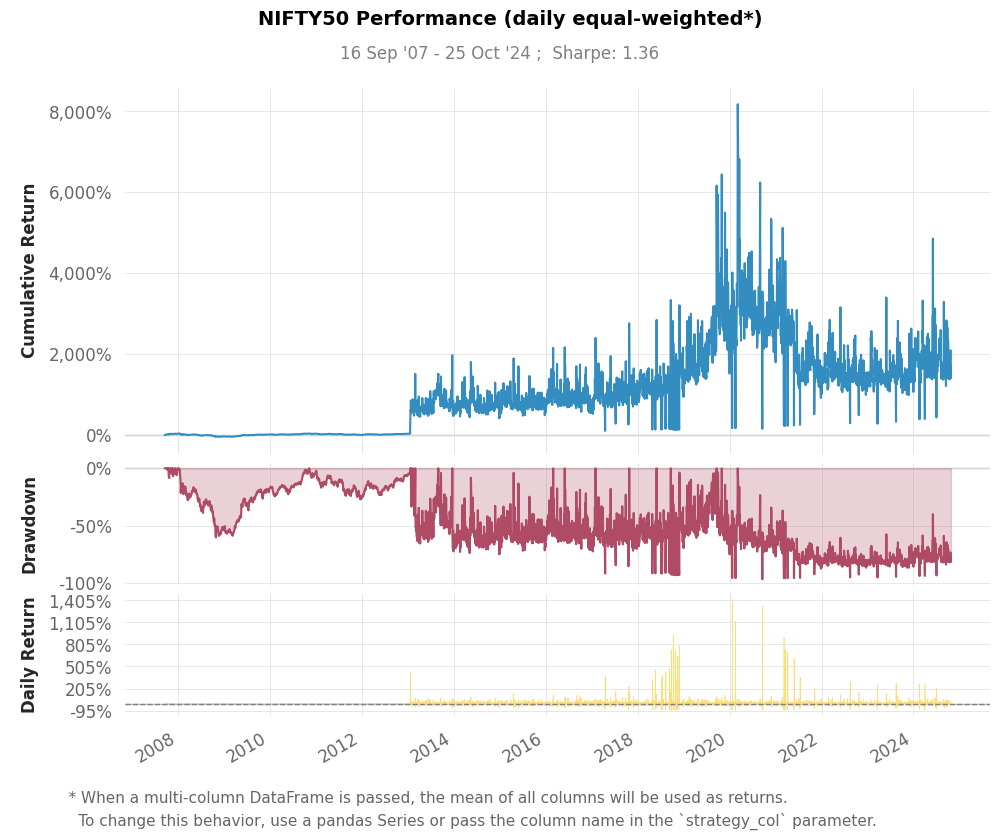

In [67]:
stock = yf.download('^NSEI')
qs.plots.snapshot(stock,title='NIFTY50 Performance')

This graph shows the performance metrics of the NIFTY50 index from September 16, 2007, to October 25, 2024, based on a daily equal-weighted strategy. The metrics include cumulative return, drawdown, and daily return, with a Sharpe ratio of 1.36.

### Key Observations:

1. **Cumulative Return (Top Panel, Blue Line)**:
   - The cumulative return has seen significant growth, especially around 2020, where a noticeable spike occurs. This suggests a period of high returns or strong market performance.
   - There are periods of volatility with rapid increases and decreases, especially noticeable post-2020, reflecting increased market fluctuations or possibly market corrections.

2. **Drawdown (Middle Panel, Red Area)**:
   - Drawdown shows significant negative periods, especially during the financial crisis around 2008 and subsequent economic downturns. This aligns with historical market stress points.
   - Since 2020, drawdowns have increased in frequency and depth, possibly due to global events like the COVID-19 pandemic or other economic factors.
   - Drawdowns reaching near -100% indicate substantial losses, highlighting the index’s vulnerability in certain periods.

3. **Daily Return (Bottom Panel, Yellow Line)**:
   - The daily returns show high variability, with some spikes representing days of extreme positive or negative returns. Notably, there is a large spike around 2020-2021, which could relate to pandemic-induced market volatility.
   - Most daily returns remain within a consistent range, but occasional extreme returns indicate isolated events with significant market impact.

4. **Sharpe Ratio (1.36)**:
   - A Sharpe ratio of 1.36 suggests a relatively good risk-adjusted return, though it isn’t extremely high. This reflects moderate volatility relative to returns, indicating that while the strategy is profitable, it carries some risk.

### Summary:
The NIFTY50 has had strong cumulative returns with notable periods of drawdowns and high daily return volatility, especially in recent years. The elevated drawdowns and return spikes around 2020-2021 align with global market stressors, showing the index’s sensitivity to economic events. The Sharpe ratio suggests acceptable risk-adjusted performance, but the volatility indicates the importance of careful risk management for this investment strategy.

In [68]:
df2 = yf.download('^NSEI',start = '2003-01-01',end='2021-12-12',interval = '1wk')
df2.head(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,,
2007-09-17 00:00:00+00:00,4837.549805,4837.549805,4855.700195,4481.549805,4518.450195,0
2007-09-24 00:00:00+00:00,5021.350098,5021.350098,5055.799805,4837.149902,4837.149902,0
2007-10-01 00:00:00+00:00,5185.850098,5185.850098,5261.350098,5001.350098,5021.500000,0
2007-10-08 00:00:00+00:00,5428.250000,5428.250000,5549.299805,5000.950195,5186.250000,0
2007-10-15 00:00:00+00:00,5215.299805,5215.299805,5736.799805,5101.750000,5428.350098,0


A Golden Cross(GC) generally refers to a situation where a shorter-term moving average (e.g., 13-week Exponential Moving Average) crosses above a longer-term moving average (e.g., 20-week EMA), indicating a potential upward trend.

1. The closing price for the week is greater than the 20-week Exponential Moving Average(EMA).
2. The 13-week EMA is greater than the 20-week Exponential Moving Average.

In [69]:
df2 = df2.reset_index(drop=True)

In [70]:
# Flatten column headers to remove multi-level indexing
df2.columns = ['_'.join(col).strip() for col in df2.columns.values]

# Rename columns to avoid special characters
df2 = df2.rename(columns={
    'Close_^NSEI': 'Close',
    'High_^NSEI': 'High',
    'Low_^NSEI': 'Low',
    'Open_^NSEI': 'Open',
    'Volume_^NSEI': 'Volume'
})

# Calculate EMAs using the simplified column names
df2["EMA_20"] = ta.ema(df2["Close"], length=20)
df2["EMA_13"] = ta.ema(df2["Close"], length=13)

# Drop rows with NaN values
df2 = df2.dropna(subset=["EMA_20", "EMA_13"])

# Apply conditions for weekly close > 20 W EMA & 13 W EMA > 20 W EMA
df2["GC1"] = (df2["Close"] > df2["EMA_20"]) & (df2["EMA_13"] > df2["EMA_20"])

# Check the first few rows to confirm the changes
print(df2.head())


    Adj Close_^NSEI        Close         High          Low         Open  \
19      5317.250000  5317.250000  5391.600098  5071.000000  5380.950195   
20      5120.350098  5120.350098  5545.200195  5034.250000  5315.549805   
21      5302.899902  5302.899902  5315.399902  4803.600098  5120.549805   
22      5110.750000  5110.750000  5368.450195  5092.799805  5304.450195   
23      5223.500000  5223.500000  5368.149902  5055.149902  5112.250000   

    Volume       EMA_20       EMA_13    GC1  
19       0  5650.647485  5677.823126  False  
20       0  5600.142972  5598.184122  False  
21       0  5571.834108  5556.000662  False  
22       0  5527.921336  5492.393425  False  
23       0  5498.928828  5453.980078  False  


In [71]:
df2.tail(50)

,Adj Close_^NSEI,Close,High,Low,Open,Volume,EMA_20,EMA_13,GC1
693,14018.500000,14018.500000,14049.849609,13811.549805,13815.150391,2034400,12506.551025,12939.324138,True
694,14347.250000,14347.250000,14367.299805,13953.750000,14104.349609,2792500,12681.855689,13140.456404,True
695,14433.700195,14433.700195,14653.349609,14357.849609,14474.049805,3886300,12848.698023,13325.205517,True
696,14371.900391,14371.900391,14753.549805,14222.799805,14453.299805,3412600,12993.764915,13474.733356,True
697,13634.599609,13634.599609,14491.099609,13596.750000,14477.799805,2670400,13054.796791,13497.571392,True
698,14924.250000,14924.250000,15014.650391,13661.750000,13758.599609,4475300,13232.839954,13701.382622,True
699,15163.299805,15163.299805,15257.099609,14977.200195,15064.299805,3081200,13416.693273,13910.227934,True
700,14981.750000,14981.750000,15431.750000,14898.200195,15270.299805,3092100,13565.746294,14063.302515,True
701,14529.150391,14529.150391,15176.500000,14467.750000,14999.049805,3665300,13657.499065,14129.852211,True
702,14938.099609,14938.099609,15273.150391,14638.549805,14702.500000,2848800,13779.461022,14245.316125,True


In [72]:
#Apply RSI 14 W > 50
# df2["GC2"] = (df2.ta.rsi(length=14, append=True)>50) & (df2.ta.rsi(length=9, append=True)>df2.ta.rsi(length=14, append=True))

df2["GC2"] = (df2.ta.rsi(length=14, append=True)>50)

In [73]:
df2.tail(5)

,Adj Close_^NSEI,Close,High,Low,Open,Volume,EMA_20,EMA_13,GC1,RSI_14,GC2
738,18102.750000,18102.750000,18123.000000,17798.199219,18040.199219,1351700,17131.080477,17535.338369,True,69.410418,True
739,17764.800781,17764.800781,18210.150391,17688.500000,18140.949219,1121900,17191.434792,17568.118714,True,63.275187,True
740,17026.449219,17026.449219,17805.250000,16985.699219,17796.250000,1575500,17175.721880,17490.737357,False,52.381382,True
741,17196.699219,17196.699219,17489.800781,16782.400391,17055.800781,1714800,17177.719722,17448.731909,True,54.333700,True
742,17511.300781,17511.300781,17543.250000,16891.699219,17209.050781,1185300,17209.489347,17457.670319,True,57.778514,True


In [74]:
#Apply flag when both conditions are getting satisfied to create BUY and SELL trigger
df2["GC"] = (df2["GC1"]==True) & (df2["GC2"]==True)

In [75]:
df2.tail(50)

,Adj Close_^NSEI,Close,High,Low,Open,Volume,EMA_20,EMA_13,GC1,RSI_14,GC2,GC
693,14018.500000,14018.500000,14049.849609,13811.549805,13815.150391,2034400,12506.551025,12939.324138,True,77.326967,True,True
694,14347.250000,14347.250000,14367.299805,13953.750000,14104.349609,2792500,12681.855689,13140.456404,True,79.367660,True,True
695,14433.700195,14433.700195,14653.349609,14357.849609,14474.049805,3886300,12848.698023,13325.205517,True,79.880486,True,True
696,14371.900391,14371.900391,14753.549805,14222.799805,14453.299805,3412600,12993.764915,13474.733356,True,78.380674,True,True
697,13634.599609,13634.599609,14491.099609,13596.750000,14477.799805,2670400,13054.796791,13497.571392,True,63.147383,True,True
698,14924.250000,14924.250000,15014.650391,13661.750000,13758.599609,4475300,13232.839954,13701.382622,True,73.023435,True,True
699,15163.299805,15163.299805,15257.099609,14977.200195,15064.299805,3081200,13416.693273,13910.227934,True,74.393276,True,True
700,14981.750000,14981.750000,15431.750000,14898.200195,15270.299805,3092100,13565.746294,14063.302515,True,71.426827,True,True
701,14529.150391,14529.150391,15176.500000,14467.750000,14999.049805,3665300,13657.499065,14129.852211,True,64.519683,True,True
702,14938.099609,14938.099609,15273.150391,14638.549805,14702.500000,2848800,13779.461022,14245.316125,True,67.571149,True,True


In [76]:
# Create boolean Signals(TS_Entries, TS_Exits) for vectorbt
golden = df2.ta.tsignals(df2.GC, asbool=True, append=True)

In [77]:
df2.tail(50)

,Adj Close_^NSEI,Close,High,Low,Open,Volume,EMA_20,EMA_13,GC1,RSI_14,GC2,GC,TS_Trends,TS_Trades,TS_Entries,TS_Exits
693,14018.500000,14018.500000,14049.849609,13811.549805,13815.150391,2034400,12506.551025,12939.324138,True,77.326967,True,True,True,0,False,False
694,14347.250000,14347.250000,14367.299805,13953.750000,14104.349609,2792500,12681.855689,13140.456404,True,79.367660,True,True,True,0,False,False
695,14433.700195,14433.700195,14653.349609,14357.849609,14474.049805,3886300,12848.698023,13325.205517,True,79.880486,True,True,True,0,False,False
696,14371.900391,14371.900391,14753.549805,14222.799805,14453.299805,3412600,12993.764915,13474.733356,True,78.380674,True,True,True,0,False,False
697,13634.599609,13634.599609,14491.099609,13596.750000,14477.799805,2670400,13054.796791,13497.571392,True,63.147383,True,True,True,0,False,False
698,14924.250000,14924.250000,15014.650391,13661.750000,13758.599609,4475300,13232.839954,13701.382622,True,73.023435,True,True,True,0,False,False
699,15163.299805,15163.299805,15257.099609,14977.200195,15064.299805,3081200,13416.693273,13910.227934,True,74.393276,True,True,True,0,False,False
700,14981.750000,14981.750000,15431.750000,14898.200195,15270.299805,3092100,13565.746294,14063.302515,True,71.426827,True,True,True,0,False,False
701,14529.150391,14529.150391,15176.500000,14467.750000,14999.049805,3665300,13657.499065,14129.852211,True,64.519683,True,True,True,0,False,False
702,14938.099609,14938.099609,15273.150391,14638.549805,14702.500000,2848800,13779.461022,14245.316125,True,67.571149,True,True,True,0,False,False


In [78]:
# Check if all the columns are created properly
golden.head(10)

,TS_Trends,TS_Trades,TS_Entries,TS_Exits
19,False,0,False,False
20,False,0,False,False
21,False,0,False,False
22,False,0,False,False
23,False,0,False,False
24,False,0,False,False
25,False,0,False,False
26,False,0,False,False
27,False,0,False,False
28,False,0,False,False


In [79]:
# Create the Signals Portfolio
pf = vbt.Portfolio.from_signals(df2.Close, entries=golden.TS_Entries, exits=golden.TS_Exits, freq="W", init_cash=100, fees=0.0025, slippage=0.0025)

In [80]:
# Print Portfolio Stats and Return Stats
print(pf.stats(settings=dict(required_return=0.1, risk_free=0.07)))

Start                                                  19
End                                                   742
Period                                 5068 days 00:00:00
Start Value                                         100.0
End Value                                      262.719353
Total Return [%]                               162.719353
Benchmark Return [%]                           229.330026
Max Gross Exposure [%]                              100.0
Total Fees Paid                                 18.253181
Max Drawdown [%]                                34.426674
Max Drawdown Duration                  2450 days 00:00:00
Total Trades                                           25
Total Closed Trades                                    24
Total Open Trades                                       1
Open Trade PnL                                   3.428309
Win Rate [%]                                    45.833333
Best Trade [%]                                  50.714342
Worst Trade [%

In [81]:
# Print Portfolio Stats and Return Stats
print(pf.returns_stats(settings=dict(required_return=0.1, risk_free=0.01)))

Start                                        19
End                                         742
Period                       5068 days 00:00:00
Total Return [%]                     162.719353
Benchmark Return [%]                 229.330026
Annualized Return [%]                  7.204258
Annualized Volatility [%]              12.93575
Max Drawdown [%]                      34.426674
Max Drawdown Duration        2450 days 00:00:00
Sharpe Ratio                           -3.42881
Calmar Ratio                           0.209264
Omega Ratio                            0.210687
Sortino Ratio                         -7.106082
Skew                                   0.861347
Kurtosis                              11.043441
Tail Ratio                             1.111172
Common Sense Ratio                     1.191223
Value at Risk                         -0.027161
Alpha                                 -0.248899
Beta                                    0.38171
dtype: object


[*********************100%***********************]  1 of 1 completed


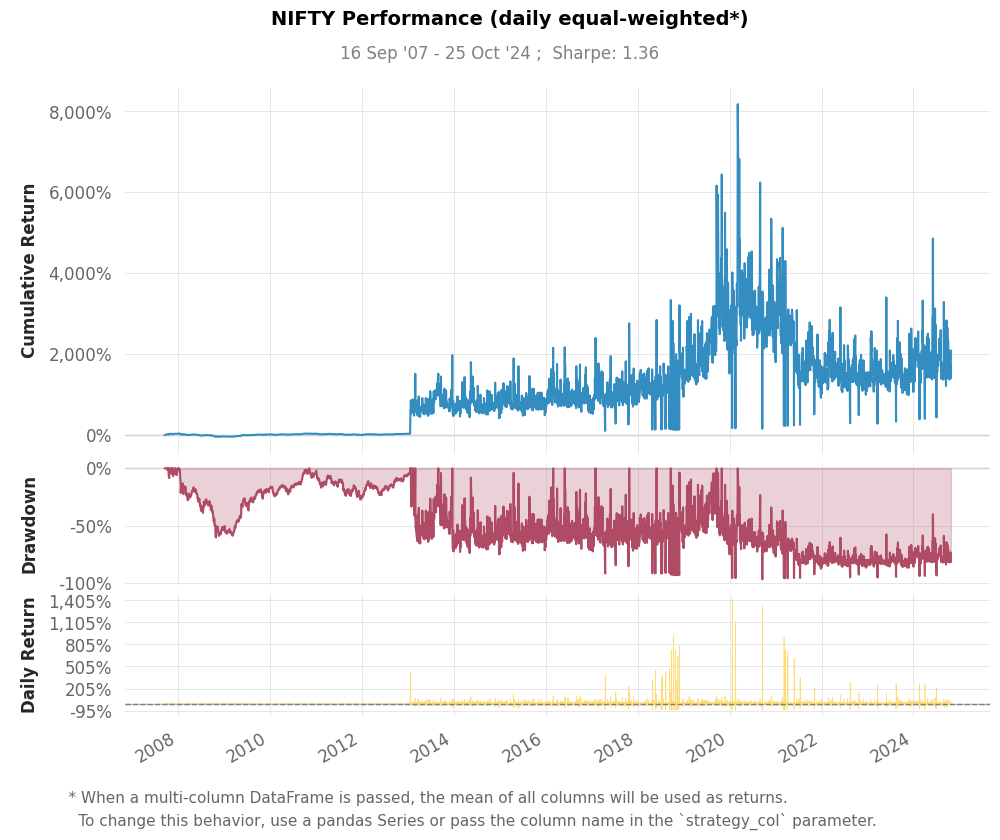

In [82]:
# fetch the daily returns for a stock
stock1 = yf.download('^NSEI')

qs.plots.snapshot(stock1, title='NIFTY Performance')

In [85]:
pf.plot().show()